In [1]:
import warnings
warnings.filterwarnings('ignore')

#import visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.cm as cm

#import libraries
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/top-youtube-news-media-statistics/Mainstream Media Statistics.csv')

In [3]:
df.head()

,Unnamed: 0,channelName,id,subscribers,total views,total videos,created date,description,playlistId
0,0,Fox News,UCXIJgqnII2ZOINSWNOGFThA,10500000,14839464315,93767,2006-09-19T01:48:52Z,FOX News Channel (FNC) is a 24-hour all-encomp...,UUXIJgqnII2ZOINSWNOGFThA
1,1,Al Jazeera English,UCNye-wNBqNL5ZzHSJj3l8Bg,10500000,3343817389,105487,2006-11-23T14:12:43Z,"#AlJazeeraEnglish, we focus on people and even...",UUNye-wNBqNL5ZzHSJj3l8Bg
2,2,Vox,UCLXo7UDZvByw2ixzpQCufnA,11400000,3260217205,1593,2014-03-04T20:30:22Z,Vox helps you understand our world.\n\nVox vid...,UULXo7UDZvByw2ixzpQCufnA
3,3,Good Morning Britain,UCq18eeL7D9Vd8DhjMcLh9QQ,1200000,1048952422,11212,2014-08-18T09:23:49Z,The Good Morning Britain YouTube channel deliv...,UUq18eeL7D9Vd8DhjMcLh9QQ
4,4,E! News,UCjDsbbzHgTrGc4Ff26TJtsA,1220000,515416062,12501,2005-10-25T11:21:48Z,E! News is your go-to source for breaking cele...,UUjDsbbzHgTrGc4Ff26TJtsA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    43 non-null     int64 
 1   channelName   43 non-null     object
 2   id            43 non-null     object
 3   subscribers   43 non-null     int64 
 4   total views   43 non-null     int64 
 5   total videos  43 non-null     int64 
 6   created date  43 non-null     object
 7   description   41 non-null     object
 8   playlistId    43 non-null     object
dtypes: int64(4), object(5)
memory usage: 3.1+ KB


In [5]:
df.describe()

,Unnamed: 0,subscribers,total views,total videos
count,43.000000,4.300000e+01,4.300000e+01,43.000000
mean,21.000000,4.640233e+06,3.180360e+09,48653.511628
std,12.556539,3.826104e+06,3.549518e+09,45868.278609
min,0.000000,4.400000e+05,1.410688e+07,187.000000
25%,10.500000,2.050000e+06,1.158999e+09,17058.500000
50%,21.000000,3.420000e+06,1.900892e+09,30946.000000
75%,31.500000,5.640000e+06,3.711164e+09,75105.000000
max,42.000000,1.520000e+07,1.483946e+10,199036.000000


In [6]:
df.isnull().sum()

Unnamed: 0      0
channelName     0
id              0
subscribers     0
total views     0
total videos    0
created date    0
description     2
playlistId      0
dtype: int64

In [7]:
generic_description = "Not available"

# Fill null values with the generic description
df.fillna(generic_description, inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0      0
channelName     0
id              0
subscribers     0
total views     0
total videos    0
created date    0
description     0
playlistId      0
dtype: int64

In [9]:
df.drop_duplicates()
df.drop('Unnamed: 0', axis=1, inplace=True)
df


,channelName,id,subscribers,total views,total videos,created date,description,playlistId
0,Fox News,UCXIJgqnII2ZOINSWNOGFThA,10500000,14839464315,93767,2006-09-19T01:48:52Z,FOX News Channel (FNC) is a 24-hour all-encomp...,UUXIJgqnII2ZOINSWNOGFThA
1,Al Jazeera English,UCNye-wNBqNL5ZzHSJj3l8Bg,10500000,3343817389,105487,2006-11-23T14:12:43Z,"#AlJazeeraEnglish, we focus on people and even...",UUNye-wNBqNL5ZzHSJj3l8Bg
2,Vox,UCLXo7UDZvByw2ixzpQCufnA,11400000,3260217205,1593,2014-03-04T20:30:22Z,Vox helps you understand our world.\n\nVox vid...,UULXo7UDZvByw2ixzpQCufnA
3,Good Morning Britain,UCq18eeL7D9Vd8DhjMcLh9QQ,1200000,1048952422,11212,2014-08-18T09:23:49Z,The Good Morning Britain YouTube channel deliv...,UUq18eeL7D9Vd8DhjMcLh9QQ
4,E! News,UCjDsbbzHgTrGc4Ff26TJtsA,1220000,515416062,12501,2005-10-25T11:21:48Z,E! News is your go-to source for breaking cele...,UUjDsbbzHgTrGc4Ff26TJtsA
5,ABC News In-depth,UCxcrzzhQDj5zKJbXfIscCtg,1320000,572043478,2717,2019-08-18T23:30:03Z,"Welcome to ABC News In-depth, where you'll fin...",UUxcrzzhQDj5zKJbXfIscCtg
6,BBC News,UC16niRr50-MSBwiO3YDb3RA,14500000,4602144155,18897,2006-04-08T05:51:05Z,Welcome to the official BBC News YouTube chann...,UU16niRr50-MSBwiO3YDb3RA
7,ABC News,UCBi2mrWuNuyYy4gbM6fU18Q,14700000,12985125977,80633,2006-08-07T23:12:21Z,ABC News is your daily source for breaking nat...,UUBi2mrWuNuyYy4gbM6fU18Q
8,CBC News: The National,UCKjU3KzdbJE1EFcHVqXC3_g,1510000,925942531,26521,2007-10-17T21:34:25Z,"The National is the flagship of CBC News, show...",UUKjU3KzdbJE1EFcHVqXC3_g
9,CNN,UCupvZG-5ko_eiXAupbDfxWw,15200000,14208712681,160250,2005-10-02T16:06:36Z,CNN operates as a division of Turner Broadcast...,UUupvZG-5ko_eiXAupbDfxWw


In [10]:
# Summary statistics for numerical variables
summary_stats = df[['subscribers', 'total views', 'total videos']].describe()

print(summary_stats)

        subscribers   total views   total videos
count  4.300000e+01  4.300000e+01      43.000000
mean   4.640233e+06  3.180360e+09   48653.511628
std    3.826104e+06  3.549518e+09   45868.278609
min    4.400000e+05  1.410688e+07     187.000000
25%    2.050000e+06  1.158999e+09   17058.500000
50%    3.420000e+06  1.900892e+09   30946.000000
75%    5.640000e+06  3.711164e+09   75105.000000
max    1.520000e+07  1.483946e+10  199036.000000


In [11]:
# Apply the custom formatter to the x-axis ticks
def format_large_numbers(value, _):
    if value >= 1e9:
        return f'{value/1e9:.1f}B'
    elif value >= 1e6:
        return f'{value/1e6:.1f}M'
    elif value >= 1e3:
        return f'{value/1e3:.1f}K'
    else:
        return str(value)

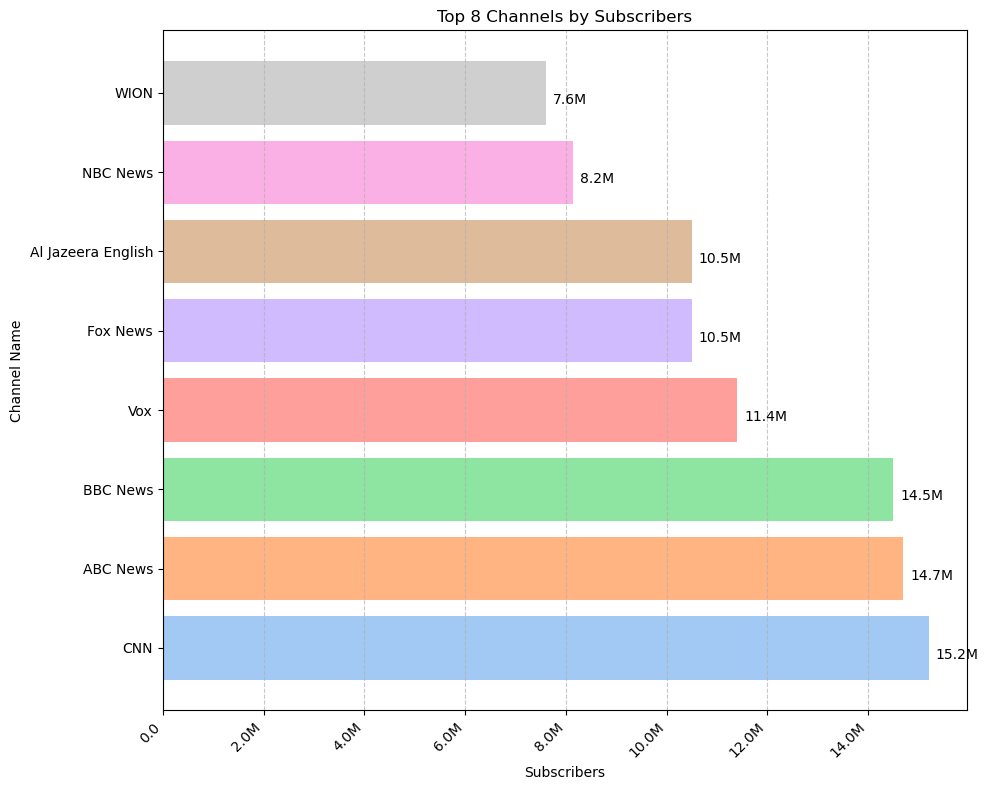

In [12]:
# Sort the DataFrame by subscribers and select the top 8 channels
df = df.nlargest(8, 'subscribers')

# Create a horizontal bar plot 
plt.figure(figsize=(10, 8))  # Increase the figure size
colors = sns.color_palette('pastel')
bars = plt.barh(df['channelName'], df['subscribers'], color=colors)

plt.xlabel('Subscribers')
plt.ylabel('Channel Name')
plt.title('Top 8 Channels by Subscribers')


plt.gca().xaxis.set_major_formatter(FuncFormatter(format_large_numbers))

# Annotate the bars with their values
for bar in bars:
    width = bar.get_width()
    plt.gca().annotate(format_large_numbers(width, None), xy=(width, bar.get_y() + bar.get_height() / 2),
                       xytext=(5, -8), textcoords='offset points', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Rotate the channel names for better visibility
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Display the plot
plt.show()

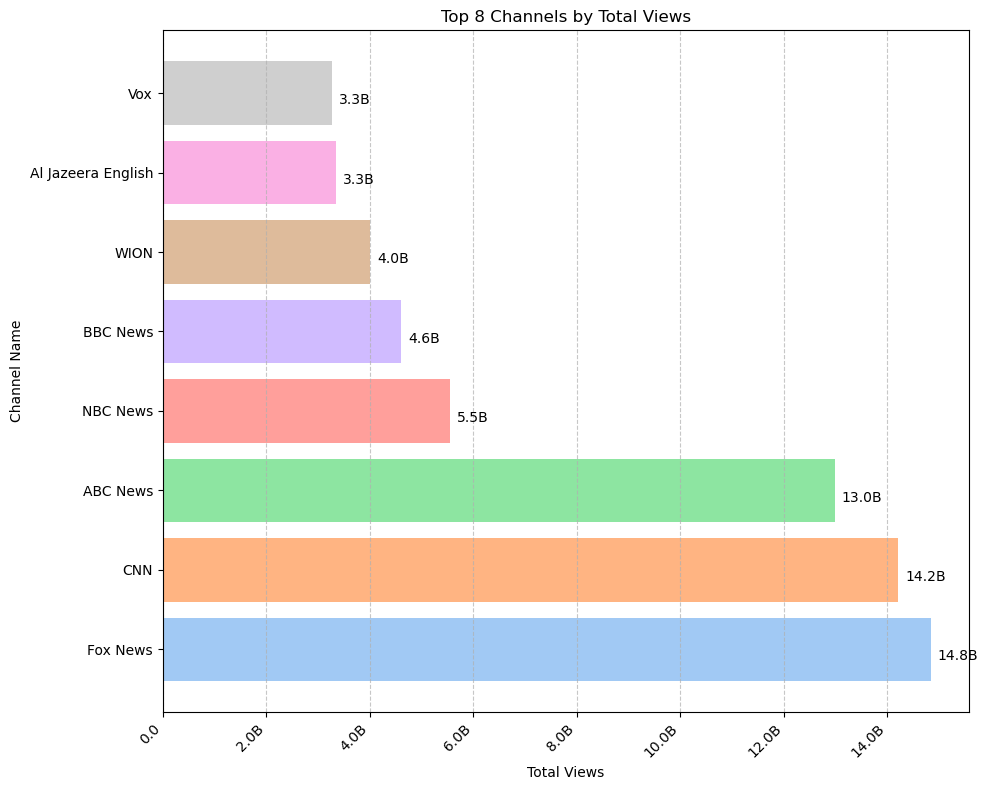

In [13]:
# Sort the DataFrame by total views and select the top 8 channels
df = df.nlargest(8, 'total views')

# Create a horizontal bar plot 
plt.figure(figsize=(10, 8))  # Increase the figure size
colors = sns.color_palette('pastel')
bars = plt.barh(df['channelName'], df['total views'], color=colors)

plt.xlabel('Total Views')
plt.ylabel('Channel Name')
plt.title('Top 8 Channels by Total Views')


plt.gca().xaxis.set_major_formatter(FuncFormatter(format_large_numbers))

# Annotate the bars with their values
for bar in bars:
    width = bar.get_width()
    plt.gca().annotate(format_large_numbers(width, None), xy=(width, bar.get_y() + bar.get_height() / 2),
                       xytext=(5, -8), textcoords='offset points', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Rotate the channel names for better visibility
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Display the plot
plt.show()

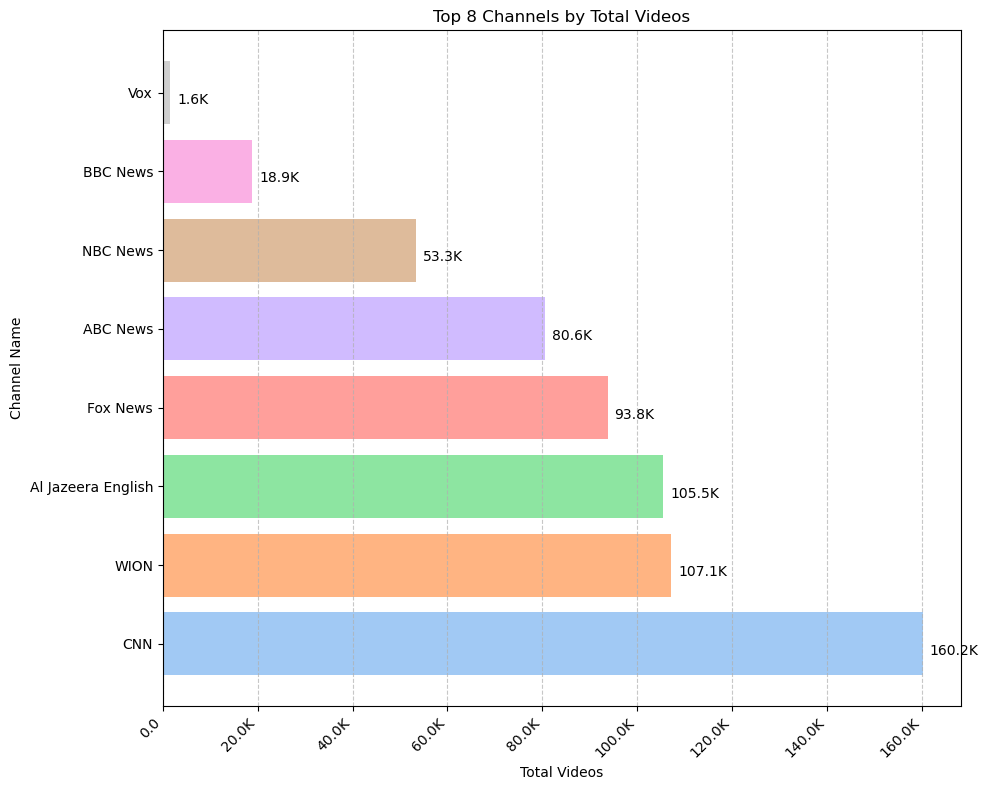

In [14]:
# Sort the DataFrame by total videos and select the top 8 channels
df = df.nlargest(8, 'total videos')

# Create a horizontal bar plot 
plt.figure(figsize=(10, 8))  # Increase the figure size
colors = sns.color_palette('pastel')
bars = plt.barh(df['channelName'], df['total videos'], color=colors)

plt.xlabel('Total Videos')
plt.ylabel('Channel Name')
plt.title('Top 8 Channels by Total Videos')


plt.gca().xaxis.set_major_formatter(FuncFormatter(format_large_numbers))

# Annotate the bars with their values
for bar in bars:
    width = bar.get_width()
    plt.gca().annotate(format_large_numbers(width, None), xy=(width, bar.get_y() + bar.get_height() / 2),
                       xytext=(5, -8), textcoords='offset points', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)

# Rotate the channel names for better visibility
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Display the plot
plt.show()

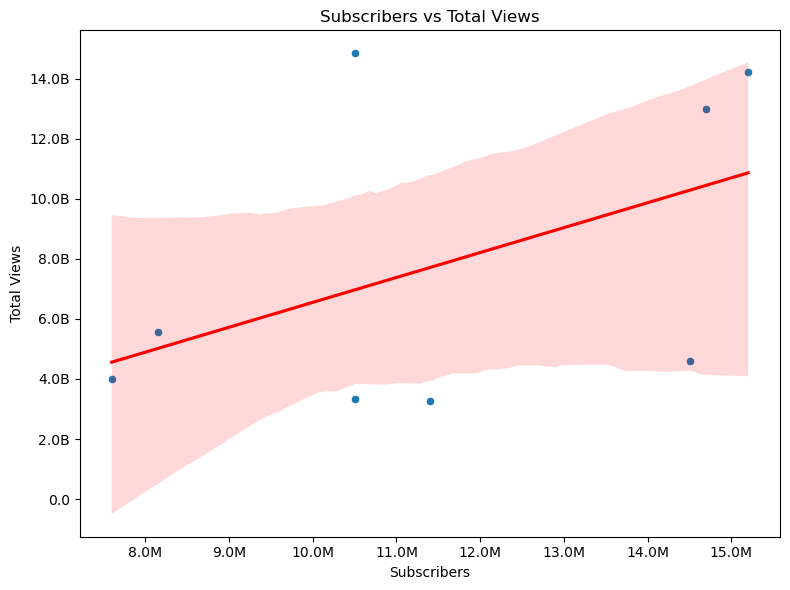

In [15]:
# Create a scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='subscribers', y='total views', data=df)
sns.regplot(x='subscribers', y='total views', data=df, scatter=False, color='red')
plt.title('Subscribers vs Total Views')
plt.xlabel('Subscribers')
plt.ylabel('Total Views')

# Apply the custom formatter to the x-axis and y-axis ticks
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_large_numbers))
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_large_numbers))

plt.tight_layout()

# Display the plot
plt.show()

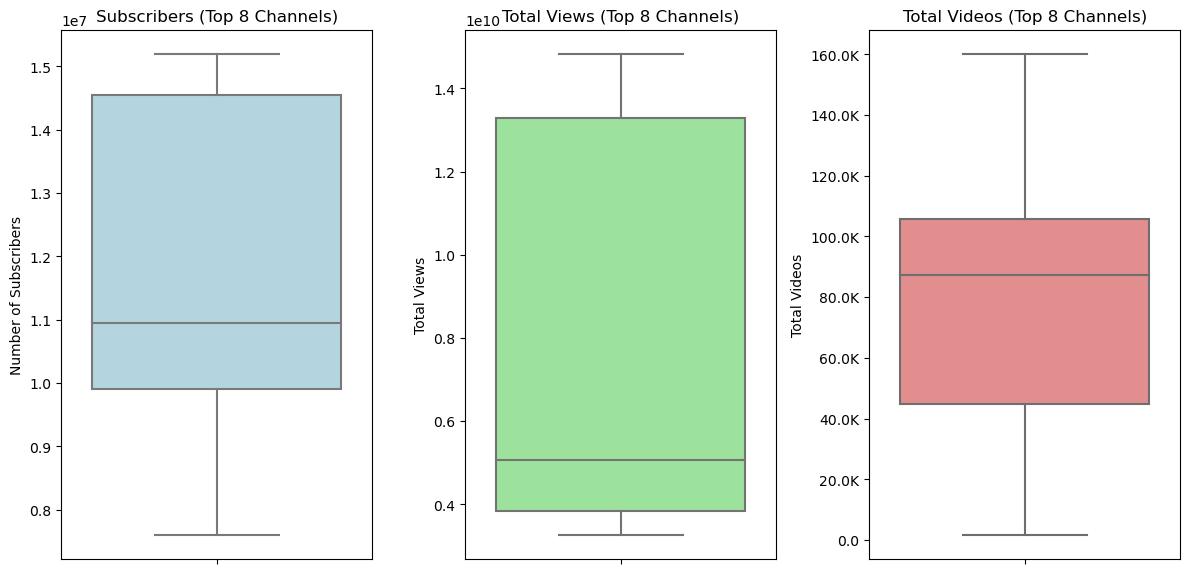

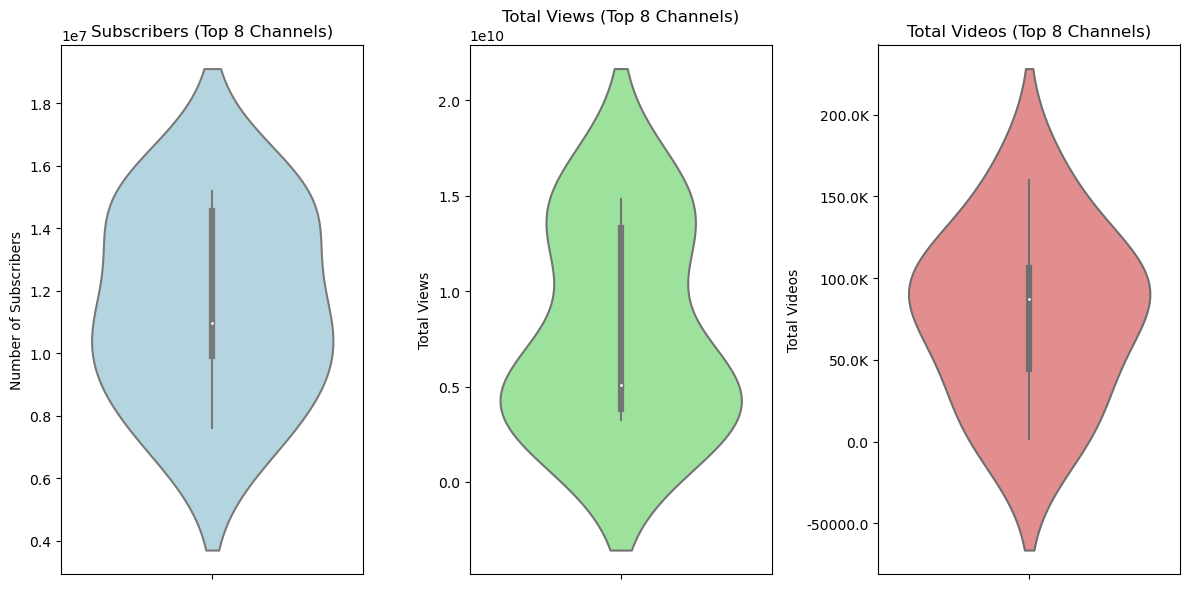

In [16]:
# Sort the DataFrame by 'subscribers', 'total views', and 'total videos' and select the top 8 rows for each variable
top_8_subscribers = df.nlargest(8, 'subscribers')
top_8_total_views = df.nlargest(8, 'total views')
top_8_total_videos = df.nlargest(8, 'total videos')

# Create box plots for the top 8 channels of 'subscribers', 'total views', and 'total videos'
plt.figure(figsize=(12, 6))

# Box plot: Subscribers
plt.subplot(1, 3, 1)
sns.boxplot(y='subscribers', data=top_8_subscribers, color='lightblue')
plt.title('Subscribers (Top 8 Channels)')
plt.ylabel('Number of Subscribers')

# Box plot: Total Views
plt.subplot(1, 3, 2)
sns.boxplot(y='total views', data=top_8_total_views, color='lightgreen')
plt.title('Total Views (Top 8 Channels)')
plt.ylabel('Total Views')

# Box plot: Total Videos
plt.subplot(1, 3, 3)
sns.boxplot(y='total videos', data=top_8_total_videos, color='lightcoral')
plt.title('Total Videos (Top 8 Channels)')
plt.ylabel('Total Videos')

# Apply the custom formatter to the y-axis ticks for box plots
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_large_numbers))

plt.tight_layout()

# Create violin plots for the top 8 channels of 'subscribers', 'total views', and 'total videos'
plt.figure(figsize=(12, 6))

# Violin plot: Subscribers
plt.subplot(1, 3, 1)
sns.violinplot(y='subscribers', data=top_8_subscribers, color='lightblue')
plt.title('Subscribers (Top 8 Channels)')
plt.ylabel('Number of Subscribers')

# Violin plot: Total Views
plt.subplot(1, 3, 2)
sns.violinplot(y='total views', data=top_8_total_views, color='lightgreen')
plt.title('Total Views (Top 8 Channels)')
plt.ylabel('Total Views')

# Violin plot: Total Videos
plt.subplot(1, 3, 3)
sns.violinplot(y='total videos', data=top_8_total_videos, color='lightcoral')
plt.title('Total Videos (Top 8 Channels)')
plt.ylabel('Total Videos')

# Apply the custom formatter to the y-axis ticks for violin plots
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_large_numbers))

plt.tight_layout()

# Display the plots
plt.show()

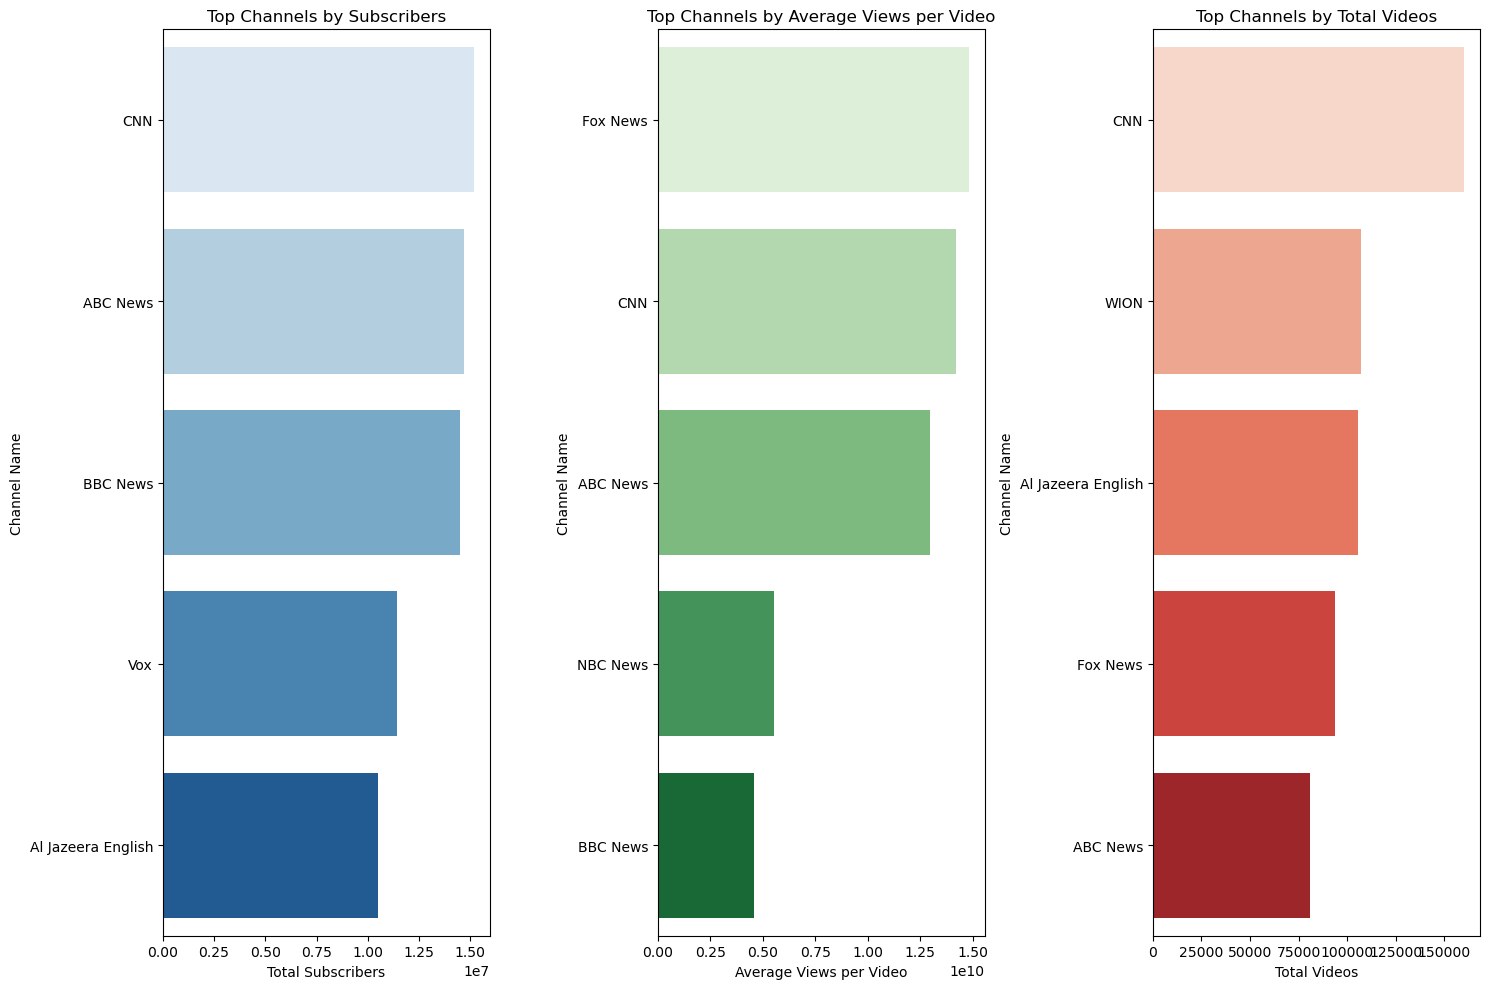

In [17]:
# Group the data by 'channelName' and compute aggregate statistics for each channel
channel_stats = df.groupby('channelName').agg(
    total_subscribers=('subscribers', 'sum'),
    average_views_per_video=('total views', 'mean'),
    total_videos=('total videos', 'sum')
).reset_index()

# Sort the channels based on subscribers, total views, and total videos in descending order
top_channels_by_subscribers = channel_stats.nlargest(5, 'total_subscribers')
top_channels_by_views = channel_stats.nlargest(5, 'average_views_per_video')
top_channels_by_videos = channel_stats.nlargest(5, 'total_videos')

# Create bar plots for the top channels in terms of subscribers, total views, and total videos
plt.figure(figsize=(15, 10))

# Bar plot: Top channels by subscribers
plt.subplot(1, 3, 1)
sns.barplot(x='total_subscribers', y='channelName', data=top_channels_by_subscribers, palette='Blues')
plt.title('Top Channels by Subscribers')
plt.xlabel('Total Subscribers')
plt.ylabel('Channel Name')

# Bar plot: Top channels by total views
plt.subplot(1, 3, 2)
sns.barplot(x='average_views_per_video', y='channelName', data=top_channels_by_views, palette='Greens')
plt.title('Top Channels by Average Views per Video')
plt.xlabel('Average Views per Video')
plt.ylabel('Channel Name')

# Bar plot: Top channels by total videos
plt.subplot(1, 3, 3)
sns.barplot(x='total_videos', y='channelName', data=top_channels_by_videos, palette='Reds')
plt.title('Top Channels by Total Videos')
plt.xlabel('Total Videos')
plt.ylabel('Channel Name')

plt.tight_layout()

# Display the plots
plt.show()

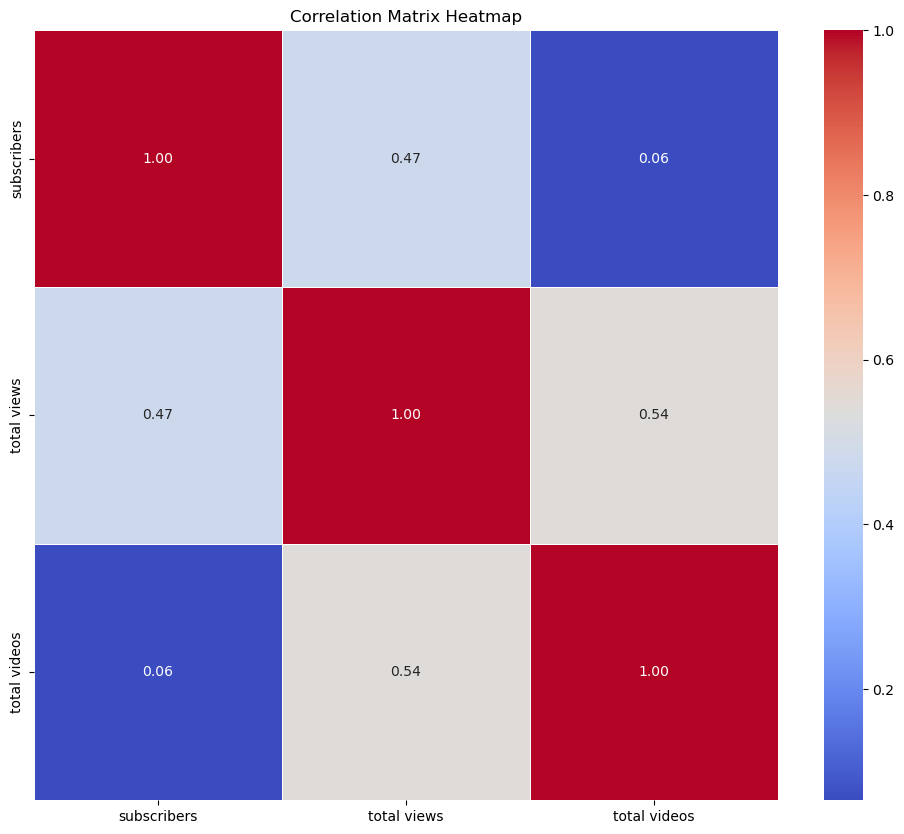

In [18]:
# Compute the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [20]:
df2 = pd.read_csv('/kaggle/input/top-youtube-news-media-statistics/_Top50_viewed_video_from_each_channels.csv')

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2200 non-null   int64  
 1   Video Id      2200 non-null   object 
 2   channelTitle  2200 non-null   object 
 3   title         2200 non-null   object 
 4   publishedAt   2200 non-null   object 
 5   categoryId    2200 non-null   int64  
 6   description   2198 non-null   object 
 7   viewCount     2196 non-null   float64
 8   likeCount     2186 non-null   float64
 9   commentCount  1964 non-null   float64
 10  duration      2200 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 189.2+ KB


In [22]:
# Descriptive statistics for 'viewCount', 'likeCount', and 'commentCount'
statistics_df = df2[['viewCount', 'likeCount', 'commentCount']].describe()

# Print the statistics dataframe
print(statistics_df)

          viewCount     likeCount   commentCount
count  2.196000e+03  2.186000e+03    1964.000000
mean   4.232016e+06  5.951541e+04    7423.666497
std    1.028097e+07  2.976349e+05   13410.006879
min    6.323700e+04  3.000000e+00       0.000000
25%    1.182263e+06  1.007200e+04    1649.000000
50%    1.941622e+06  2.141100e+04    4030.500000
75%    3.984669e+06  4.642975e+04    8653.000000
max    3.471808e+08  1.037048e+07  269937.000000


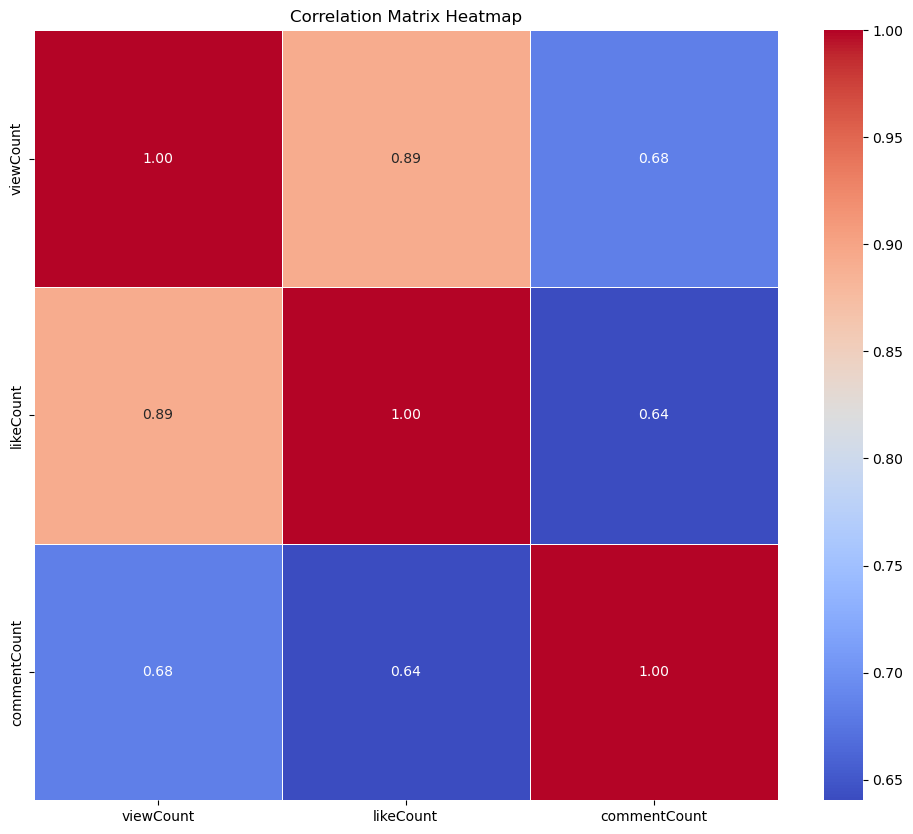

In [23]:
# Calculate the correlation matrix
correlation_matrix = df2[['viewCount', 'likeCount', 'commentCount']].corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

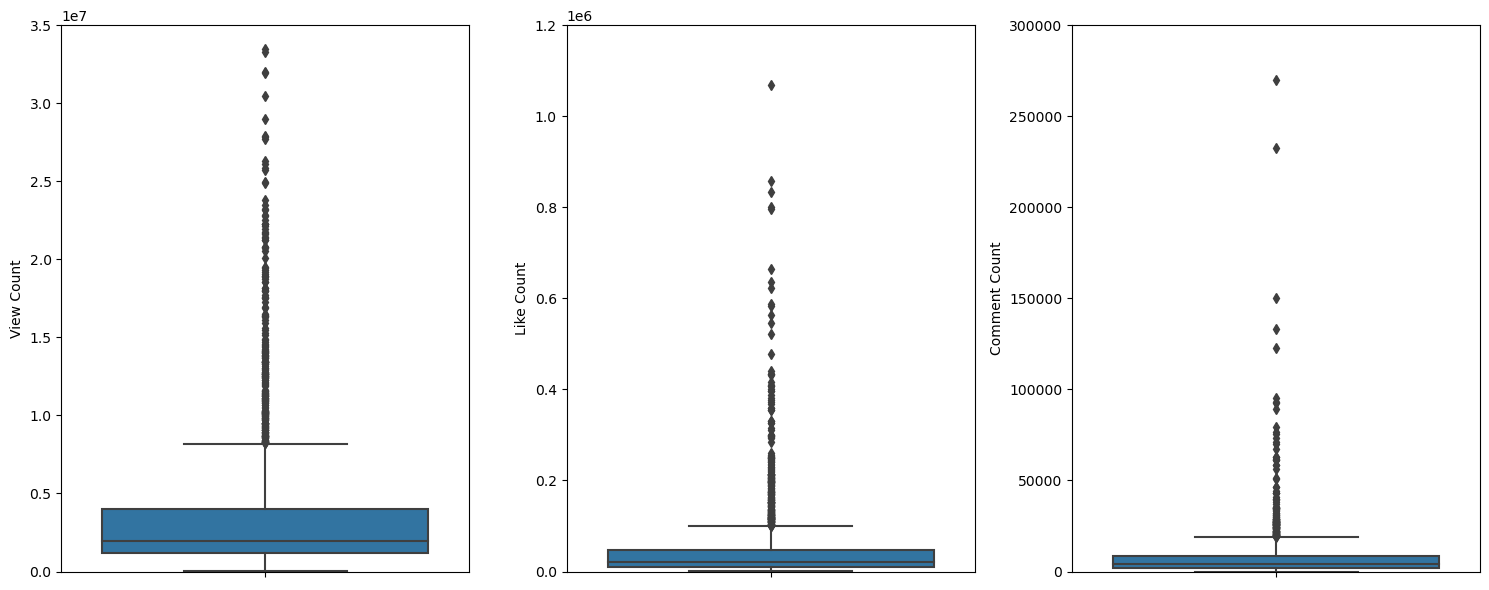

In [24]:
# Box plots for 'viewCount', 'likeCount', and 'commentCount'
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y=df2['viewCount'])
plt.ylabel('View Count')
plt.ylim(0, 35000000)  

plt.subplot(1, 3, 2)
sns.boxplot(y=df2['likeCount'])
plt.ylabel('Like Count')
plt.ylim(0, 1200000)   

plt.subplot(1, 3, 3)
sns.boxplot(y=df2['commentCount'])
plt.ylabel('Comment Count')
plt.ylim(0, 300000)    

plt.tight_layout()
plt.show()

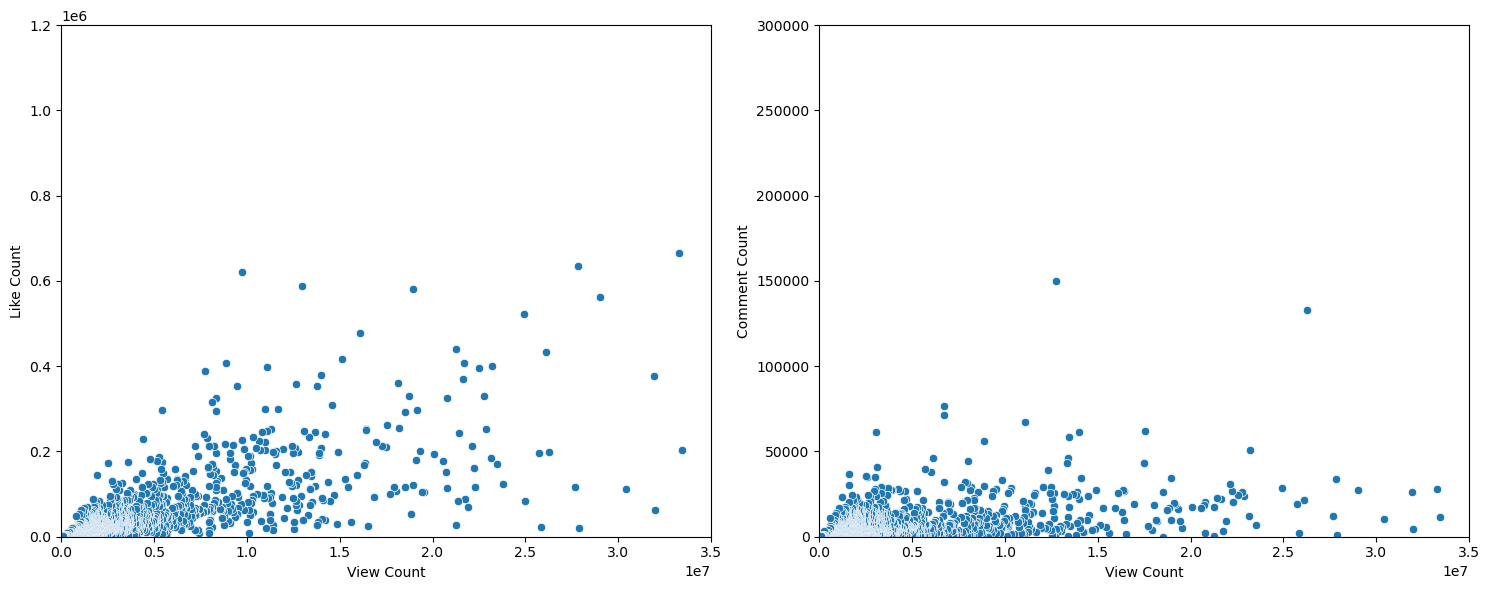

In [25]:
# Scatter plots to explore relationships
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df2, x='viewCount', y='likeCount')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.xlim(0, 35000000)  
plt.ylim(0, 1200000)   

plt.subplot(1, 2, 2)
sns.scatterplot(data=df2, x='viewCount', y='commentCount')
plt.xlabel('View Count')
plt.ylabel('Comment Count')
plt.xlim(0, 35000000)  
plt.ylim(0, 300000)    

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Common Themes from Titles:
Topic 1: news, ukraine, russian, complex, goes
Topic 2: new, ukraine, putin, war, russia
Topic 3: trump, coronavirus, watch, death, nowthis
Topic 4: biden, good, morning, britain, joe
Topic 5: inside, wsj, foreign, na, sa


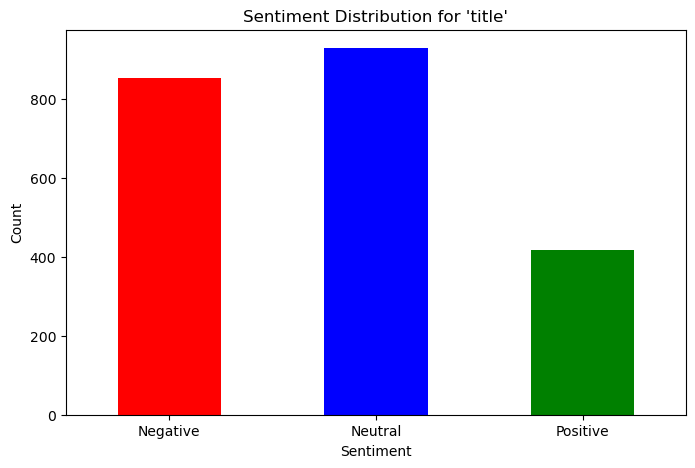

In [26]:
# Step 1: Tokenization
nltk.download('punkt')
df2['tokens_title'] = df2['title'].apply(lambda x: word_tokenize(x))
df2['tokens_description'] = df2['description'].apply(lambda x: word_tokenize(str(x)))  # Convert to string before tokenization

# Step 2: Text Cleaning
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df2['cleaned_title'] = df2['tokens_title'].apply(lambda x: [word.lower() for word in x if word.isalnum() and word.lower() not in stop_words])
df2['cleaned_description'] = df2['tokens_description'].apply(lambda x: [word.lower() for word in x if word.isalnum() and word.lower() not in stop_words])

# Step 3: Keyword Extraction using TF-IDF
tfidf_vectorizer_title = TfidfVectorizer(max_features=500)  # For 'title' column
tfidf_vectorizer_description = TfidfVectorizer(max_features=500)  # For 'description' column

tfidf_title = tfidf_vectorizer_title.fit_transform(df2['cleaned_title'].apply(lambda x: ' '.join(x)))
tfidf_description = tfidf_vectorizer_description.fit_transform(df2['cleaned_description'].apply(lambda x: ' '.join(x)))

# Step 4: Sentiment Analysis 
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
# Sentiment analysis for 'title' column
df2['sentiment_title'] = df2['title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df2['sentiment_label_title'] = df2['sentiment_title'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Sentiment analysis for 'description' column
df2['sentiment_description'] = df2['description'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
df2['sentiment_label_description'] = df2['sentiment_description'].apply(lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral'))

# Step 5: Common Themes from Titles (Topic Extraction)
n_topics = 5  # Number of topics to extract
lda_model_title = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model_title.fit(tfidf_title)

print("\nCommon Themes from Titles:")
for i in range(n_topics):
    top_words = [tfidf_vectorizer_title.get_feature_names_out()[topic.argsort()[-5:][::-1]].tolist() for topic in lda_model_title.components_]
    print(f"Topic {i+1}: {', '.join(top_words[i])}")

# Step 6: Visualize sentiment distribution for 'title'
plt.figure(figsize=(8, 5))
sentiment_counts_title = df2['sentiment_label_title'].value_counts()

# Reorder the values to match the desired order: 'Negative', 'Neutral', 'Positive'
sentiment_counts_title = sentiment_counts_title.reindex(['Negative', 'Neutral', 'Positive'])

sentiment_counts_title.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Sentiment Distribution for 'title'")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'], rotation=0)
plt.show()




Common Themes from Descriptions:
Topic 1: http, https, news, video, us
Topic 2: cbc, news, http, itv, fox
Topic 3: news, cbs, abc, http, https
Topic 4: ukraine, https, russia, guardian, msnbc
Topic 5: https, complex, sky, us, news


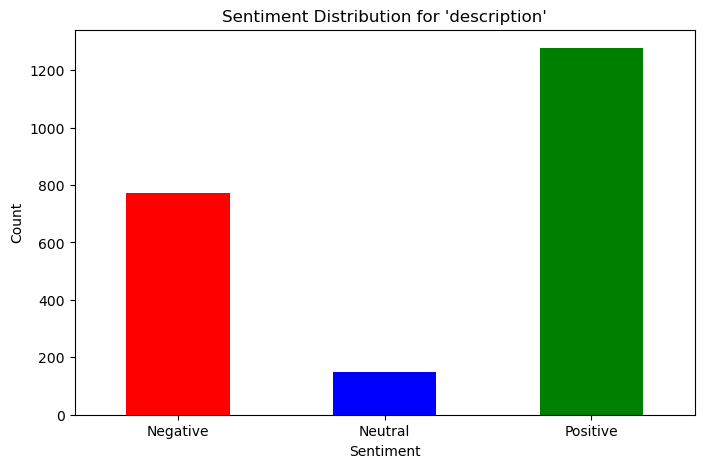

In [27]:
# Step 5: Common Themes from Descriptions (Topic Extraction)
n_topics_desc = 5  # Number of topics to extract
lda_model_description = LatentDirichletAllocation(n_components=n_topics_desc, random_state=42)
lda_model_description.fit(tfidf_description)

print("\nCommon Themes from Descriptions:")
for i in range(n_topics_desc):
    top_words_desc = [tfidf_vectorizer_description.get_feature_names_out()[topic.argsort()[-5:][::-1]].tolist() for topic in lda_model_description.components_]
    print(f"Topic {i+1}: {', '.join(top_words_desc[i])}")

    # Step 6: Visualize sentiment distribution for 'description'
plt.figure(figsize=(8, 5))
sentiment_counts_description = df2['sentiment_label_description'].value_counts()

# Reorder the values to match the desired order: 'Negative', 'Neutral', 'Positive'
sentiment_counts_description = sentiment_counts_description.reindex(['Negative', 'Neutral', 'Positive'])

sentiment_counts_description.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Sentiment Distribution for 'description'")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'], rotation=0)
plt.show()